In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../data/fraud test.csv")
df.drop("Unnamed: 0", inplace=True, axis=1)

In [3]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  float64
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [5]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'], dayfirst=True)

In [6]:
df.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

is_fraud      1.000000
amt           0.182267
lat           0.005863
merch_lat     0.005812
long         -0.000972
merch_long   -0.001060
cc_num       -0.001540
zip          -0.002271
city_pop     -0.004910
unix_time    -0.013066
Name: is_fraud, dtype: float64

In [7]:
drop_cols = ["cc_num", "first", "last", "street", "zip", "trans_num"]

for col in drop_cols:
    df.drop(col, axis=1, inplace=True)


In [8]:
df['year'] = df['trans_date_trans_time'].apply(lambda x: x.year) 
df['month'] = df['trans_date_trans_time'].apply(lambda x: x.month) 
df['day'] = df['trans_date_trans_time'].apply(lambda x: x.day) 
df['hour'] = df['trans_date_trans_time'].apply(lambda x: x.hour)
df['minute'] = df['trans_date_trans_time'].apply(lambda x: x.minute) 
df['second'] = df['trans_date_trans_time'].apply(lambda x: x.second) 

In [9]:
df.drop("trans_date_trans_time", axis=1, inplace=True)

In [10]:
df.drop("job", axis=1, inplace=True)

In [11]:
df.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,333497,19/03/1968,1371816865,33.986391,-81.200714,0,2020,6,21,12,14,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,302,17/01/1990,1371816873,39.450498,-109.960431,0,2020,6,21,12,14,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,34496,21/10/1970,1371816893,40.495810,-74.196111,0,2020,6,21,12,14,0
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,54767,25/07/1987,1371816915,28.812398,-80.883061,0,2020,6,21,12,15,0
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,1126,06/07/1955,1371816917,44.959148,-85.884734,0,2020,6,21,12,15,0


In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.15, random_state=100)

In [13]:
train_set.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
367321,fraud_O'Connell-Ullrich,home,92.62,F,Plymouth,CT,41.6611,-73.0449,2376,06/04/1973,1384097782,41.550514,-72.384989,0,2020,11,10,15,36,0
174757,fraud_Huel Ltd,misc_net,84.00,F,Clarks Mills,PA,41.3851,-80.1752,606,22/09/1997,1377109969,40.500651,-79.609731,0,2020,8,21,18,32,0
442682,fraud_Pacocha-O'Reilly,grocery_pos,145.26,M,Kirk,CO,39.6171,-102.4776,207,04/12/1955,1386394423,38.727636,-101.748507,0,2020,12,7,5,33,0
478200,fraud_Bogisich-Weimann,kids_pets,154.31,F,West Monroe,LA,32.5317,-92.1760,54185,20/11/1992,1387046981,31.940079,-92.767968,0,2020,12,14,18,49,0
429093,fraud_Murray-Smitham,grocery_pos,158.68,F,Lahoma,OK,36.3850,-98.0727,1078,06/07/1952,1386128337,37.365402,-97.784930,0,2020,12,4,3,38,0


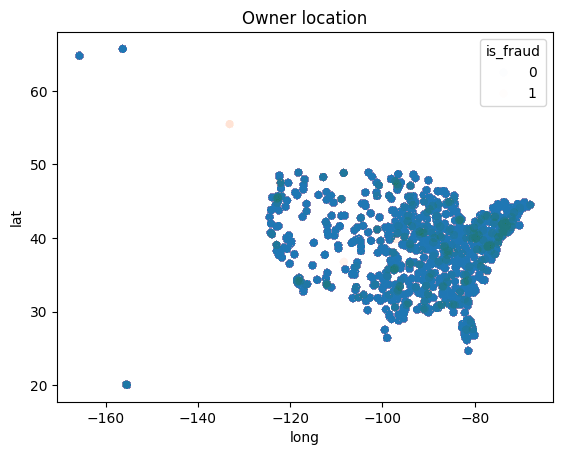

In [14]:
sns.scatterplot(x='long', y='lat', hue='is_fraud', data=train_set, alpha=0.01)
plt.title('Owner location')
plt.show()

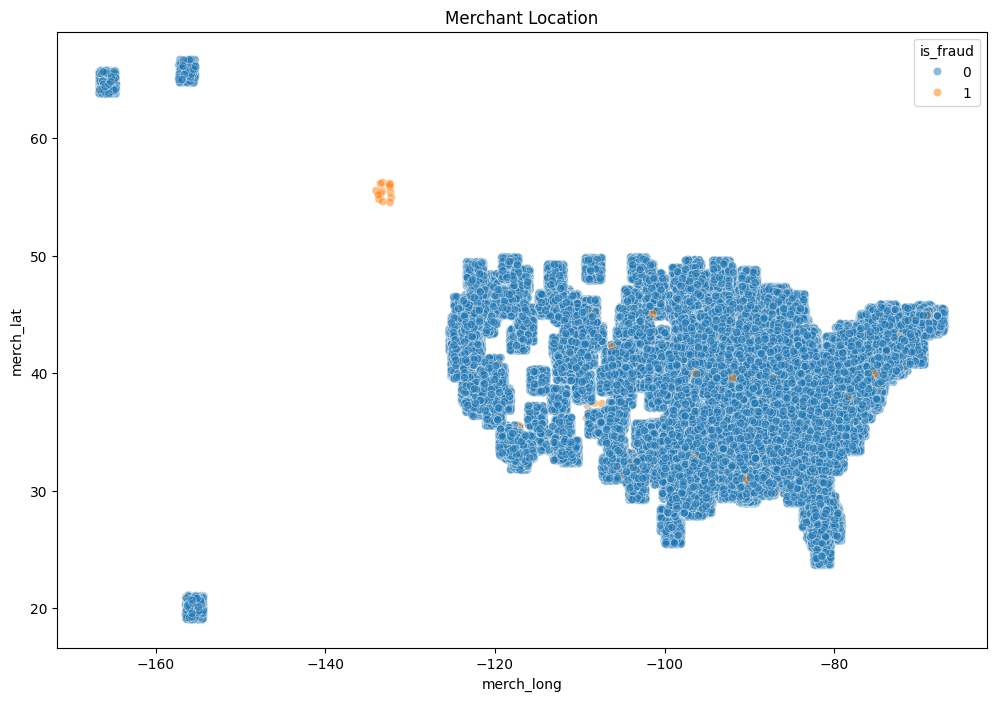

In [15]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='merch_long', y='merch_lat', hue='is_fraud', data=train_set, alpha=0.5)
plt.title('Merchant Location')
plt.show()

In [16]:
train_set.head()

,merchant,category,amt,gender,city,state,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second
367321,fraud_O'Connell-Ullrich,home,92.62,F,Plymouth,CT,41.6611,-73.0449,2376,06/04/1973,1384097782,41.550514,-72.384989,0,2020,11,10,15,36,0
174757,fraud_Huel Ltd,misc_net,84.00,F,Clarks Mills,PA,41.3851,-80.1752,606,22/09/1997,1377109969,40.500651,-79.609731,0,2020,8,21,18,32,0
442682,fraud_Pacocha-O'Reilly,grocery_pos,145.26,M,Kirk,CO,39.6171,-102.4776,207,04/12/1955,1386394423,38.727636,-101.748507,0,2020,12,7,5,33,0
478200,fraud_Bogisich-Weimann,kids_pets,154.31,F,West Monroe,LA,32.5317,-92.1760,54185,20/11/1992,1387046981,31.940079,-92.767968,0,2020,12,14,18,49,0
429093,fraud_Murray-Smitham,grocery_pos,158.68,F,Lahoma,OK,36.3850,-98.0727,1078,06/07/1952,1386128337,37.365402,-97.784930,0,2020,12,4,3,38,0


In [17]:
train_set['category'].nunique()

14

In [18]:
def set_dummies(col):
    global train_set, test_set
    train_dummies = pd.get_dummies(train_set[col], dtype=int)
    test_dummies = pd.get_dummies(test_set[col], dtype=int)

    train_set = pd.concat([train_set, train_dummies], axis=1)
    train_set.drop(col, axis=1, inplace=True)

    test_set = pd.concat([test_set, test_dummies], axis=1)
    test_set.drop(col, axis=1, inplace=True)
    

In [19]:
set_dummies("gender")
set_dummies("category")

In [20]:
train_set.shape[1] == test_set.shape[1]

True

In [21]:
train_set.drop('dob', inplace=True, axis=1)
test_set.drop('dob', inplace=True, axis=1)

In [22]:
train_set.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

is_fraud          1.000000
amt               0.182848
shopping_net      0.039539
grocery_pos       0.026407
misc_net          0.021894
hour              0.011103
merch_lat         0.006142
lat               0.006122
shopping_pos      0.001597
M                 0.000057
F                -0.000057
long             -0.001048
merch_long       -0.001145
minute           -0.002365
travel           -0.004230
city_pop         -0.005578
grocery_net      -0.005632
gas_transport    -0.005965
misc_pos         -0.007089
personal_care    -0.009659
day              -0.009862
health_fitness   -0.010442
entertainment    -0.010546
food_dining      -0.010713
month            -0.011900
home             -0.012907
kids_pets        -0.013193
unix_time        -0.013323
year                   NaN
second                 NaN
Name: is_fraud, dtype: float64

In [23]:
train_set.drop('city', inplace=True, axis=1)
test_set.drop('city', inplace=True, axis=1)

In [24]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 472361 entries, 367321 to 56088
Data columns (total 32 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   merchant        472361 non-null  object 
 1   amt             472361 non-null  float64
 2   state           472361 non-null  object 
 3   lat             472361 non-null  float64
 4   long            472361 non-null  float64
 5   city_pop        472361 non-null  int64  
 6   unix_time       472361 non-null  int64  
 7   merch_lat       472361 non-null  float64
 8   merch_long      472361 non-null  float64
 9   is_fraud        472361 non-null  int64  
 10  year            472361 non-null  int64  
 11  month           472361 non-null  int64  
 12  day             472361 non-null  int64  
 13  hour            472361 non-null  int64  
 14  minute          472361 non-null  int64  
 15  second          472361 non-null  int64  
 16  F               472361 non-null  int64  
 17  M          

In [25]:
# merch_dummies = pd.get_dummies(train_set["merchant"], dtype=int)
# merch_dummies = pd.concat([merch_dummies, train_set['is_fraud']], axis=1)

In [26]:
# corr_matrix = merch_dummies.corr(numeric_only=True)['is_fraud'].sort_values(ascending=False)

In [27]:
# corr_matrix = corr_matrix.apply(np.abs)

In [28]:
# corr_matrix

In [29]:
train_set.drop("merchant", axis=1, inplace=True)
test_set.drop("merchant", axis=1, inplace=True)

In [30]:
set_dummies("state")

In [31]:
train_set.shape[1] == test_set.shape[1]

True

In [32]:
corr_matrix = train_set.corr()['is_fraud'].sort_values(ascending=False)

In [33]:
corr_matrix

is_fraud        1.000000
amt             0.182848
shopping_net    0.039539
grocery_pos     0.026407
misc_net        0.021894
                  ...   
home           -0.012907
kids_pets      -0.013193
unix_time      -0.013323
year                 NaN
second               NaN
Name: is_fraud, Length: 80, dtype: float64

In [34]:
train_set.drop("year", axis=1, inplace=True)
test_set.drop("year", axis=1, inplace=True)

In [35]:
train_set.drop("second", axis=1, inplace=True)
test_set.drop("second", axis=1, inplace=True)

In [36]:
X_train = train_set.drop("is_fraud", axis=1)
y_train = train_set['is_fraud']

X_test = test_set.drop("is_fraud", axis=1)
y_test = test_set['is_fraud']

In [37]:
X_train.shape[0] == y_train.shape[0]

True

In [38]:
from sklearn.preprocessing import StandardScaler

### Three Models To start with
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

### Metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, classification_report
from sklearn.model_selection import GridSearchCV

In [39]:
scaler = StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [41]:
log_reg = LogisticRegression()

In [42]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Norm used in the penalization
    'C': [0.01, 0.1, 1],  # Inverse of regularization strength
    'solver': ['newton-cg', 'sag', 'saga'],  # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300],  # Maximum number of iterations taken for the solvers to converge
    'l1_ratio': [0.0, 0.5, 1.0]  # Used only if penalty is 'elasticnet'
}

In [43]:
grid_cv = GridSearchCV(log_reg, param_grid, n_jobs=10, cv=2,  verbose=1)

In [44]:
grid_cv.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 324 candidates, totalling 648 fits


/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/home/dude/Desktop/env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.w

KeyboardInterrupt: 